In [3]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

## Read and explore data 

In [4]:
#read in housedata data
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [5]:
df.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310  20141006T000000   365000.0         4       2.25         2070   
1  7974200820  20140821T000000   865000.0         5       3.00         2900   
2  7701450110  20140815T000000  1038000.0         4       2.50         3770   
3  9522300010  20150331T000000  1490000.0         3       3.50         4560   
4  9510861140  20140714T000000   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1986             0    98058  47.4388 -122.162   
1           1070      1977             0    98115  47.6784 -122.285   
2              0      1997             0    98006  47.5646 -122.129   
3              0      1990             0    98034  47.6995 -122.228   
4              0      2004             0    98052  47.6647 -122.083   

   sqft_living15  sqft_lot15  
0           2390        7700  
1           2370        6283  
2           3710        9685  
3           4050       14226  
4           2250        4050

df.shape

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df['date']

0        20141006T000000
1        20140821T000000
2        20140815T000000
3        20150331T000000
4        20140714T000000
              ...       
17285    20150303T000000
17286    20140520T000000
17287    20140514T000000
17288    20141204T000000
17289    20150116T000000
Name: date, Length: 17290, dtype: object

Convert date to yyyy-mm-dd

In [8]:
df['date'] = df['date'].str[:8]

In [9]:
df["date"]= pd.to_datetime(df["date"]) 

In [10]:
df['date']

0       2014-10-06
1       2014-08-21
2       2014-08-15
3       2015-03-31
4       2014-07-14
           ...    
17285   2015-03-03
17286   2014-05-20
17287   2014-05-14
17288   2014-12-04
17289   2015-01-16
Name: date, Length: 17290, dtype: datetime64[ns]

In [11]:
#Data is all present
df.isna().head()

id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  False  False  False     False      False        False     False   False   
1  False  False  False     False      False        False     False   False   
2  False  False  False     False      False        False     False   False   
3  False  False  False     False      False        False     False   False   
4  False  False  False     False      False        False     False   False   

   waterfront   view  condition  grade  sqft_above  sqft_basement  yr_built  \
0       False  False      False  False       False          False     False   
1       False  False      False  False       False          False     False   
2       False  False      False  False       False          False     False   
3       False  False      False  False       False          False     False   
4       False  False      False  False       False          False     False   

   yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  
0         False    False  False  False          False       False  
1         False    False  False  False          False       False  
2         False    False  False  False          False       False  
3         False    False  False  False          False       False  
4         False    False  False  False          False       False

Explore price as outcome variable. I decided to trim some of the extreme outlier points, anywhere price was in the 99th %tile

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ed2c790>]],
      dtype=object)

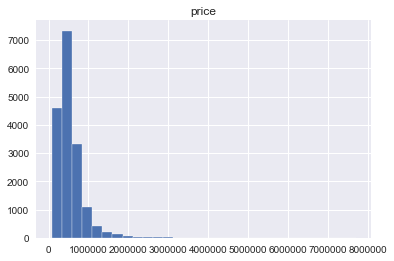

In [12]:
df.hist(column=['price'], bins=30)

In [13]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310 2014-10-06   365000.0         4       2.25         2070   
1  7974200820 2014-08-21   865000.0         5       3.00         2900   
2  7701450110 2014-08-15  1038000.0         4       2.50         3770   
3  9522300010 2015-03-31  1490000.0         3       3.50         4560   
4  9510861140 2014-07-14   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1986             0    98058  47.4388 -122.162   
1           1070      1977             0    98115  47.6784 -122.285   
2              0      1997             0    98006  47.5646 -122.129   
3              0      1990             0    98034  47.6995 -122.228   
4              0      2004             0    98052  47.6647 -122.083   

   sqft_living15  sqft_lot15  
0           2390        7700  
1           2370        6283  
2           3710        9685  
3           4050       14226  
4           2250        4050

In [14]:
print(df.price.quantile(.925))
print(df.price.quantile(.95))
print(df.price.quantile(.975))
print(df.price.quantile(.99))

973303.7500000012
1150000.0
1484977.4999999998
1990880.0000000047


## Dropping some columns

Here is my initial column drop, I decided to drop latitude, longitude, and the sqft of closest 15 neighbors. All four of these should be encompassed within zipcode as a variable so I felt comfortable dropping these right away.

In [15]:
df.drop(columns=['lat', 'long','sqft_living15','sqft_lot15'], inplace=True)

In [16]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310 2014-10-06   365000.0         4       2.25         2070   
1  7974200820 2014-08-21   865000.0         5       3.00         2900   
2  7701450110 2014-08-15  1038000.0         4       2.50         3770   
3  9522300010 2015-03-31  1490000.0         3       3.50         4560   
4  9510861140 2014-07-14   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated  zipcode  
0              0      1986             0    98058  
1           1070      1977             0    98115  
2              0      1997             0    98006  
3              0      1990             0    98034  
4              0      2004             0    98052

In [17]:
df = df[df['price'] < 1990880] 

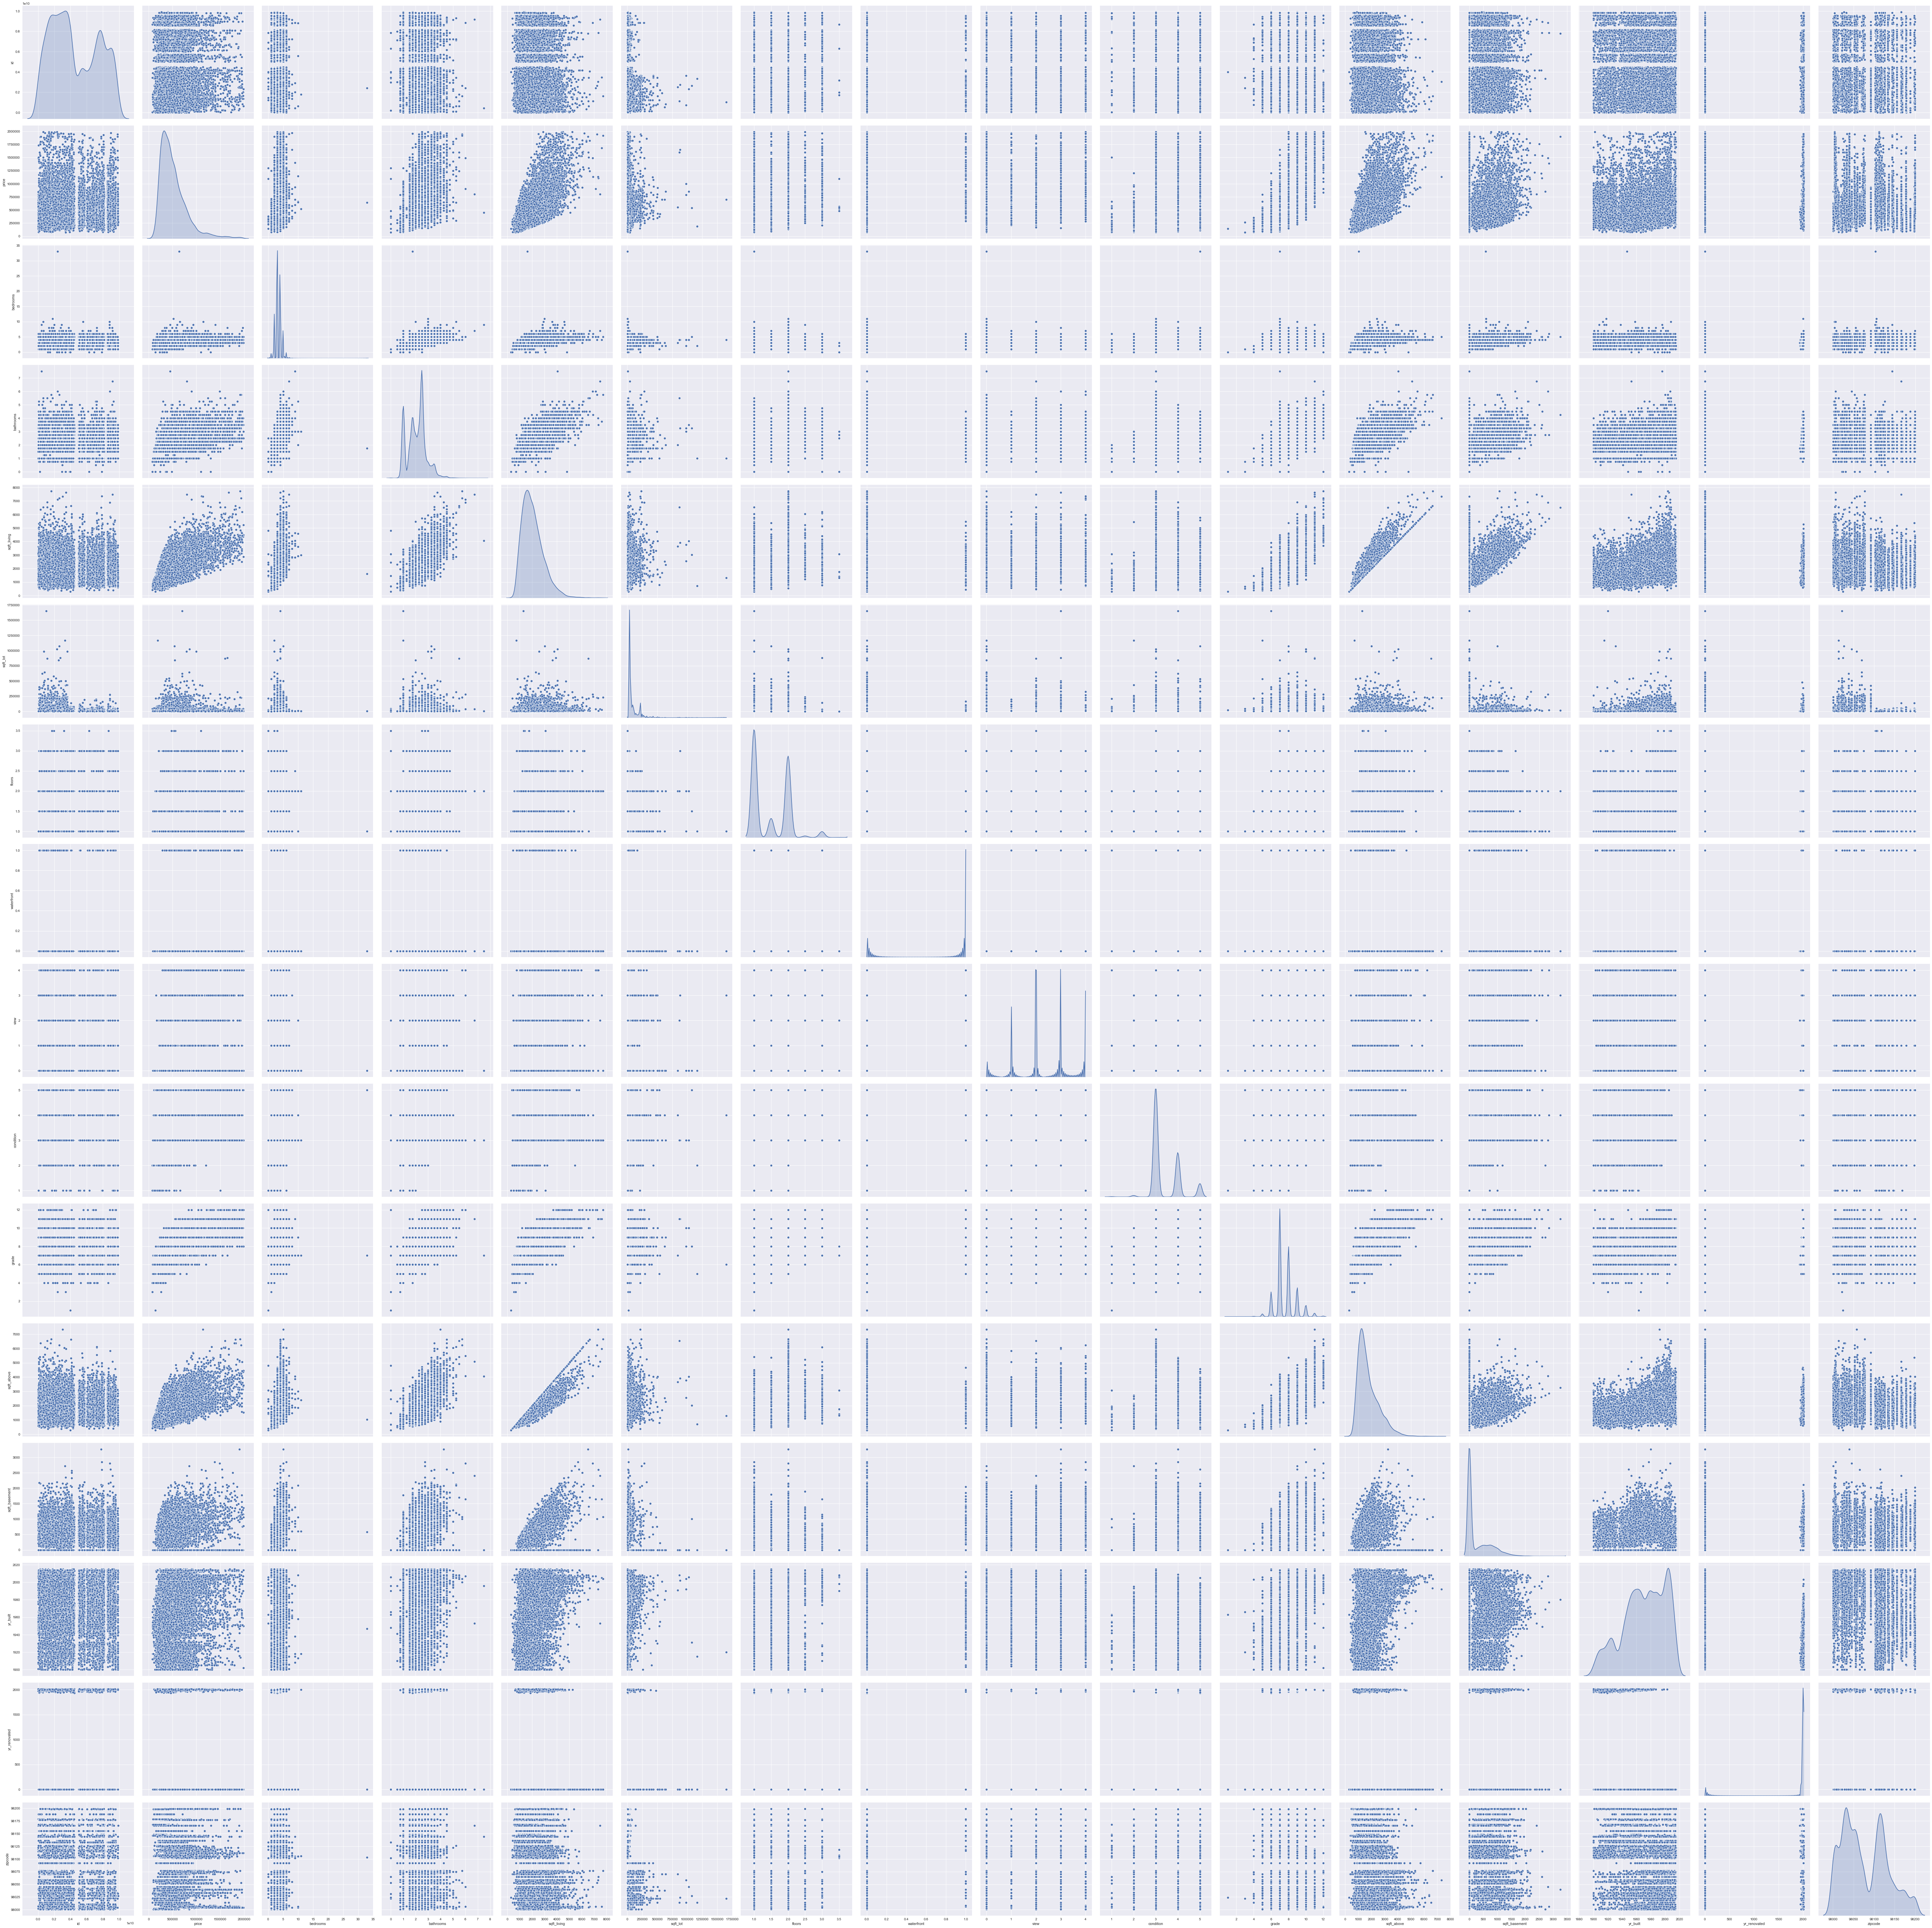

In [62]:
#sns.pairplot(df, diag_kind="kde", height=5)
#commenting this out since it takes a long time to run

## Creating Target and Feature DataFrames 

In [19]:
df_tgt = df.price
df_feat = df.drop(['price','id'], axis=1)
df_feat.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 2014-10-06         4       2.25         2070      8893     2.0           0   
1 2014-08-21         5       3.00         2900      6730     1.0           0   
2 2014-08-15         4       2.50         3770     10893     2.0           0   
3 2015-03-31         3       3.50         4560     14608     2.0           0   
4 2014-07-14         3       2.50         2550      5376     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          4      8        2070              0      1986             0   
1     0          5      8        1830           1070      1977             0   
2     2          3     11        3770              0      1997             0   
3     2          3     12        4560              0      1990             0   
4     0          3      9        2550              0      2004             0   

   zipcode  
0    98058  
1    98115  
2    98006  
3    98034  
4    98052

In [20]:
df_tgt.shape

(17117,)

In [21]:
df_feat.shape

(17117, 15)

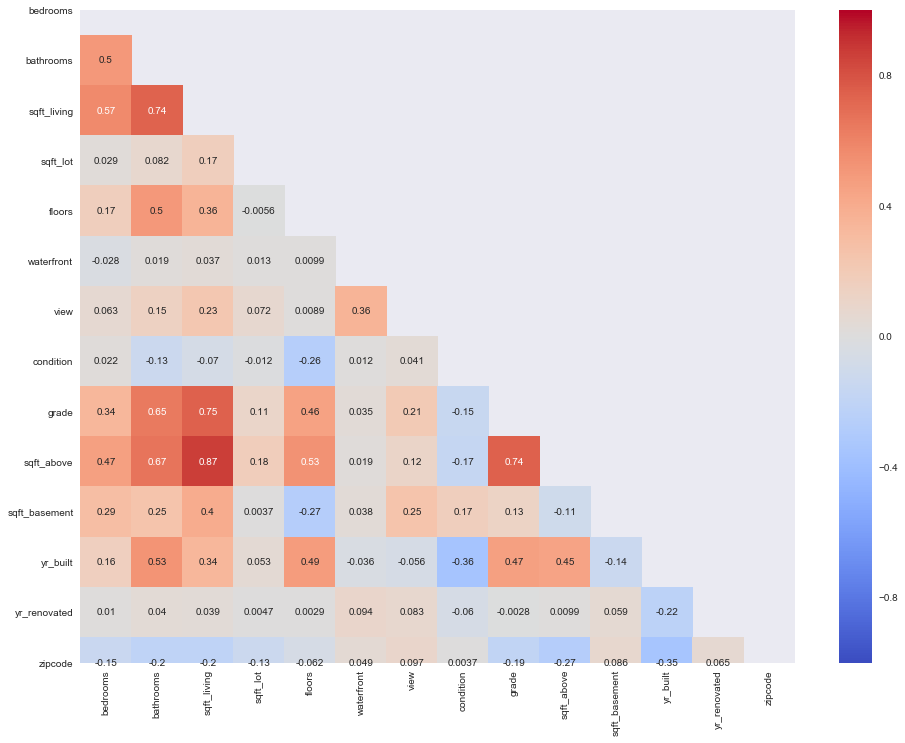

In [22]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df_feat.corr())
sns.heatmap(df_feat.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)




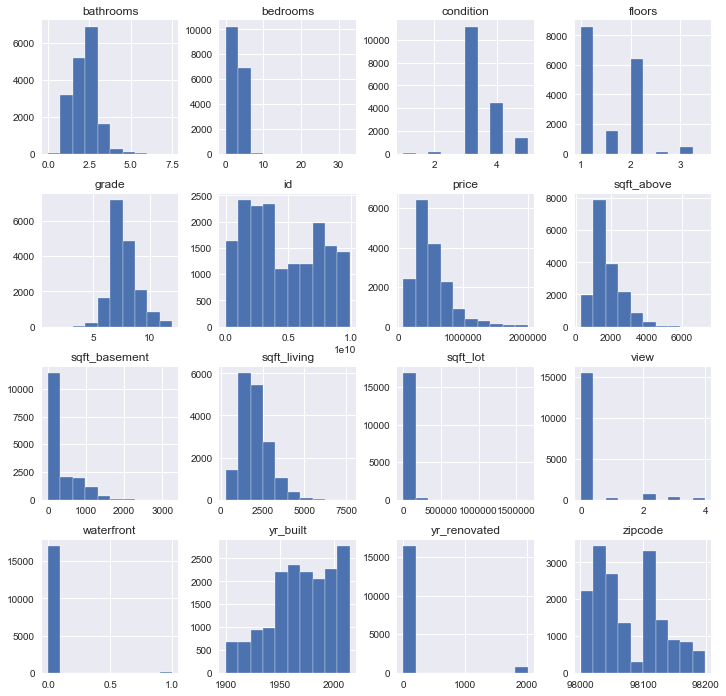

In [23]:

warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax);

## Regressions

## Base Model- All features minus date

In [24]:
df_feat_base = df_feat.drop(['date'], axis=1)

In [25]:
df_feat_base.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         4       2.25         2070      8893     2.0           0     0   
1         5       3.00         2900      6730     1.0           0     0   
2         4       2.50         3770     10893     2.0           0     2   
3         3       3.50         4560     14608     2.0           0     2   
4         3       2.50         2550      5376     2.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      8        2070              0      1986             0   
1          5      8        1830           1070      1977             0   
2          3     11        3770              0      1997             0   
3          3     12        4560              0      1990             0   
4          3      9        2550              0      2004             0   

   zipcode  
0    98058  
1    98115  
2    98006  
3    98034  
4    98052

## Create the train/test sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_base, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 14) Target:  (13693,)
Training set - Features:  (3424, 14) Target:  (3424,)


In [27]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
reg.coef_


array([-1.86143806e+04,  2.91170679e+04,  7.86967311e+01, -5.83277420e-02,
        3.95992068e+04,  2.24904231e+05,  3.97270140e+04,  2.13142487e+04,
        1.23116085e+05,  3.09639945e+01,  4.77327364e+01, -2.99592215e+03,
        1.25656226e+01,  1.82211185e+01])

In [29]:
reg.intercept_

3326042.290990488

In [30]:
df_feat_base_col = pd.DataFrame(data = df_feat_base.columns.values, columns=['Features'])
df_feat_base_col

Features
0        bedrooms
1       bathrooms
2     sqft_living
3        sqft_lot
4          floors
5      waterfront
6            view
7       condition
8           grade
9      sqft_above
10  sqft_basement
11       yr_built
12   yr_renovated
13        zipcode

In [31]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.34230682e-304, 0.00000000e+000, 0.00000000e+000, 1.30303707e-028,
       2.15399918e-234, 1.62725114e-068, 0.00000000e+000, 3.36026444e-006,
       0.00000000e+000, 0.00000000e+000, 8.68624003e-263, 1.98809061e-014,
       5.98165237e-042, 1.67884843e-007])

In [32]:
df_feat_base_col

Features
0        bedrooms
1       bathrooms
2     sqft_living
3        sqft_lot
4          floors
5      waterfront
6            view
7       condition
8           grade
9      sqft_above
10  sqft_basement
11       yr_built
12   yr_renovated
13        zipcode

In [33]:
df_feat_base_col['Weights'] = reg.coef_
df_feat_base_col['P Values'] = p_values.round(3)
df_feat_base_col.sort_values(['Weights'], ascending=False)

Features        Weights  P Values
5      waterfront  224904.230977       0.0
8           grade  123116.084759       0.0
6            view   39727.014049       0.0
4          floors   39599.206760       0.0
1       bathrooms   29117.067896       0.0
7       condition   21314.248718       0.0
2     sqft_living      78.696731       0.0
10  sqft_basement      47.732736       0.0
9      sqft_above      30.963995       0.0
13        zipcode      18.221119       0.0
12   yr_renovated      12.565623       0.0
3        sqft_lot      -0.058328       0.0
11       yr_built   -2995.922153       0.0
0        bedrooms  -18614.380591       0.0

r^2 values

In [34]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6382024472944351

In [35]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.6378321325014917

Error values

In [36]:
y_train_pred = reg.predict(X_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)





Mean Absolute Error: 121524.81844826945
Mean Squared Error: 28593246636.341423
Root Mean Squared Error: 169095.3773358143


In [37]:
price_std = df_tgt.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.4273817315287749
Root Mean Squared Error: 0.5946791452320084


In [38]:
reg.score(X_test, y_test)


0.6318015388879324

In [39]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.6302894302180677

In [40]:
y_test_pred = reg.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 127395.86929477355
Mean Squared Error: 32395218985.250595
Root Mean Squared Error: 179986.71891350928


In [41]:

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.4480292001587364
Root Mean Squared Error Z: 0.6329821065660182


Text(0, 0.5, 'Predictions')

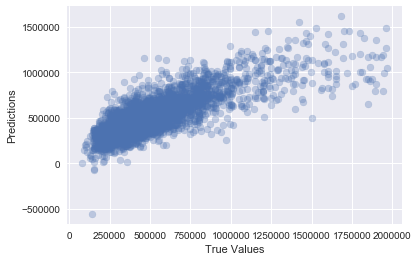

In [42]:

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [43]:

train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.632

In [44]:
summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)', '5-fold Cross Validation'])
summary_df

Empty DataFrame
Columns: [Model, Description, Root Mean Squared Error (RMSE), R-squared (training), Adjusted R-squared (training), R-squared (test), Adjusted R-squared (test), 5-fold Cross Validation]
Index: []

In [45]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'Cary- Base' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

Model Description  Root Mean Squared Error (RMSE)  \
0  Multiple Regression-1  Cary- Base                      169095.377   

   R-squared (training)  Adjusted R-squared (training)  R-squared (test)  \
0                 0.638                          0.638             0.632   

   Adjusted R-squared (test)  5-fold Cross Validation  
0                       0.63                      NaN

## Model with bedrooms, bathrooms, sqft_living, waterfront, view, condition

In [46]:
df_feat_two = df_feat[['bedrooms','bathrooms','sqft_living','sqft_lot','waterfront','view','condition']]



In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_two, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 7) Target:  (13693,)
Training set - Features:  (3424, 7) Target:  (3424,)


In [48]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.coef_
reg.intercept_
df_feat_two_col = pd.DataFrame(data = df_feat_two.columns.values, columns=['Features'])
df_feat_two_col


Features
0     bedrooms
1    bathrooms
2  sqft_living
3     sqft_lot
4   waterfront
5         view
6    condition

In [121]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.34230682e-304, 0.00000000e+000, 0.00000000e+000, 1.30303707e-028,
       1.62725114e-068, 0.00000000e+000, 3.36026444e-006])

In [122]:
df_feat_two_col['Weights'] = reg.coef_
df_feat_two_col['P Values'] = p_values.round(3)
df_feat_two_col.sort_values(['Weights'], ascending=False)

Features        Weights  P Values
2  sqft_living  191170.142525       0.0
5         view   45239.284749       0.0
6    condition   24844.917483       0.0
4   waterfront   17006.266024       0.0
1    bathrooms   11044.239380       0.0
3     sqft_lot   -9057.898840       0.0
0     bedrooms  -29599.314891       0.0

In [49]:
r2_train = reg.score(X_train, y_train)
r2_train

0.5126705407340736

In [50]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.512421267353375

In [51]:
y_train_pred = reg.predict(X_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)





Mean Absolute Error: 144531.25836312026
Mean Squared Error: 38514167157.1379
Root Mean Squared Error: 196250.26664220841


In [52]:
price_std = df_tgt.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.5082913946961152
Root Mean Squared Error: 0.6901781861639572


In [53]:
reg.score(X_test, y_test)


0.5151928175180456

In [54]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.514199360176894

In [55]:
y_test_pred = reg.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 150045.4032239731
Mean Squared Error: 42654808482.06217
Root Mean Squared Error: 206530.40570836578


In [56]:

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.5276836868107909
Root Mean Squared Error Z: 0.7263316541596422


Text(0, 0.5, 'Predictions')

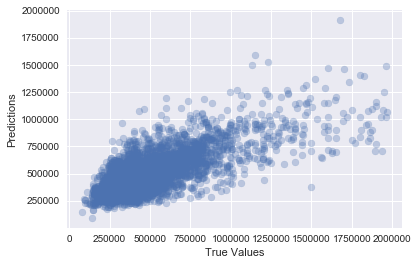

In [57]:

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [58]:

train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.515

In [59]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Cary- Two' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

Model Description  Root Mean Squared Error (RMSE)  \
0  Multiple Regression-1  Cary- Base                      169095.377   
1  Multiple Regression-2   Cary- Two                      196250.267   

   R-squared (training)  Adjusted R-squared (training)  R-squared (test)  \
0                 0.638                          0.638             0.632   
1                 0.513                          0.512             0.515   

   Adjusted R-squared (test)  5-fold Cross Validation  
0                      0.630                      NaN  
1                      0.514                      NaN

## Model 3- Base model scaled

In [112]:
scaler = StandardScaler()
scaler.fit(df_feat_two)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [113]:
df_feat_two_sc = scaler.transform(df_feat_two)
df_feat_two_sc


array([[ 0.68241456,  0.20860197,  0.02160934, ..., -0.07510054,
        -0.29824876,  0.9114778 ],
       [ 1.75346628,  1.21413277,  0.98802578, ..., -0.07510054,
        -0.29824876,  2.44965837],
       [ 0.68241456,  0.5437789 ,  2.00101649, ..., -0.07510054,
         2.41941105, -0.62670277],
       ...,
       [-0.38863716, -1.46728271, -1.16603494, ..., -0.07510054,
        -0.29824876, -0.62670277],
       [-0.38863716, -0.79692884, -0.17633137, ..., -0.07510054,
        -0.29824876,  0.9114778 ],
       [-0.38863716, -0.79692884, -0.84001494, ..., -0.07510054,
        -0.29824876,  0.9114778 ]])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_two_sc, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 7) Target:  (13693,)
Training set - Features:  (3424, 7) Target:  (3424,)


In [115]:
X_train

array([[ 0.68241456,  0.87895584,  1.33733292, ..., -0.07510054,
        -0.29824876, -0.62670277],
       [-0.38863716, -0.4617519 , -0.7352228 , ..., -0.07510054,
        -0.29824876, -0.62670277],
       [-1.45968887, -1.46728271, -1.52698566, ..., -0.07510054,
        -0.29824876,  0.9114778 ],
       ...,
       [-0.38863716,  0.20860197, -0.29276708, ..., -0.07510054,
        -0.29824876,  0.9114778 ],
       [-0.38863716,  0.5437789 , -0.37427208, ..., -0.07510054,
        -0.29824876, -0.62670277],
       [-0.38863716, -0.4617519 , -0.39755923, ..., -0.07510054,
        -0.29824876,  0.9114778 ]])

In [116]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)
df_feat_two_sc_col = pd.DataFrame(data = df_feat_two.columns.values, columns=['Features'])
df_feat_two_sc_col


[-29599.31489051  11044.23937989 191170.14252523  -9057.89884021
  17006.26602402  45239.28474866  24844.91748291]
516244.494388587


Features
0     bedrooms
1    bathrooms
2  sqft_living
3     sqft_lot
4   waterfront
5         view
6    condition

In [123]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.34230682e-304, 0.00000000e+000, 0.00000000e+000, 1.30303707e-028,
       1.62725114e-068, 0.00000000e+000, 3.36026444e-006])

In [124]:
df_feat_two_sc_col['Weights'] = reg.coef_
df_feat_two_sc_col['P Values'] = p_values.round(3)
df_feat_two_sc_col.sort_values(['Weights'], ascending=False)

Features        Weights  P Values
2  sqft_living  191170.142525       0.0
5         view   45239.284749       0.0
6    condition   24844.917483       0.0
4   waterfront   17006.266024       0.0
1    bathrooms   11044.239380       0.0
3     sqft_lot   -9057.898840       0.0
0     bedrooms  -29599.314891       0.0

In [125]:
r2_train = reg.score(X_train, y_train)
r2_train

0.5126705407340736

In [126]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.512421267353375

In [127]:
y_train_pred = reg.predict(X_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 144531.25836311965
Mean Squared Error: 38514167157.1379
Root Mean Squared Error: 196250.26664220841


In [128]:
price_std = df_tgt.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.5082913946961131
Root Mean Squared Error: 0.6901781861639572


In [129]:
reg.score(X_test, y_test)

0.5151928175180355

In [130]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.514199360176884

In [131]:
y_test_pred = reg.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 150045.4032239735
Mean Squared Error: 42654808482.063065
Root Mean Squared Error: 206530.40570836794


In [132]:

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.5276836868107924
Root Mean Squared Error Z: 0.7263316541596497


Text(0, 0.5, 'Predictions')

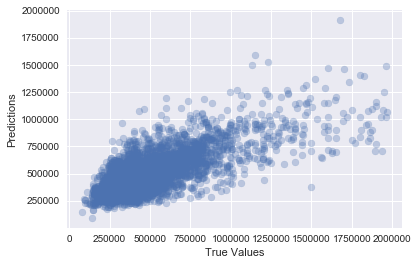

In [133]:

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [134]:

train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.515

In [135]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-3', 'Description' : 'Cary- Base Scaled' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

Model        Description  Root Mean Squared Error (RMSE)  \
0  Multiple Regression-1         Cary- Base                      169095.377   
1  Multiple Regression-2          Cary- Two                      196250.267   
2  Multiple Regression-3  Cary- Base Scaled                      169095.377   
3  Multiple Regression-3  Cary- Base Scaled                      196250.267   

   R-squared (training)  Adjusted R-squared (training)  R-squared (test)  \
0                 0.638                          0.638             0.632   
1                 0.513                          0.512             0.515   
2                 0.638                          0.638             0.632   
3                 0.513                          0.512             0.515   

   Adjusted R-squared (test)  5-fold Cross Validation  
0                      0.630                      NaN  
1                      0.514                      NaN  
2                      0.630                      NaN  
3                      0.514                      NaN